## Course Code: DS4003
## Course Name: Principles and Techniques for Data Science
## Lab Session: 05 -Clustering


#### Objectives

You will be able to: 

- Gain an understanding of how various clustering algorithms operate (e.g., K-means, Hierarchical, DBSCAN).
- Evaluate cluster quality.
- Confidently apply clustering techniques to new datasets

## Your Task: Cluster the Breast Cancer Dataset 


### The Breast Cancer Dataset

For this lab you will use the breast cancer that comes with scikit-learn. The breast cancer dataset is a collection of samples used for classifying tumors as either benign or malignant based on various features extracted from digitized images of fine needle aspirate (FNA) biopsies.

In [2]:
import numpy as np 
import pandas as pd 
from sklearn import datasets
from sklearn.datasets import load_breast_cancer

import matplotlib.cm as cm 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.datasets import make_blobs

In [3]:
cancer_data = load_breast_cancer()
data = cancer_data['data']
target = cancer_data['target']

df = pd.DataFrame(data, columns=cancer_data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## We will cover some of the methods from the lecture 
* **Elbow Method**
* **Silhouette Method**
* **AIC/BIC method** 

### Before we startanything else, we will have to normalize the data

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=cancer_data.feature_names)

scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### In our previous lab, we worked with dimensionality reduction techniques. Since we have so many features in this dataset, it makes sense to apply dimensionality reduction on it.

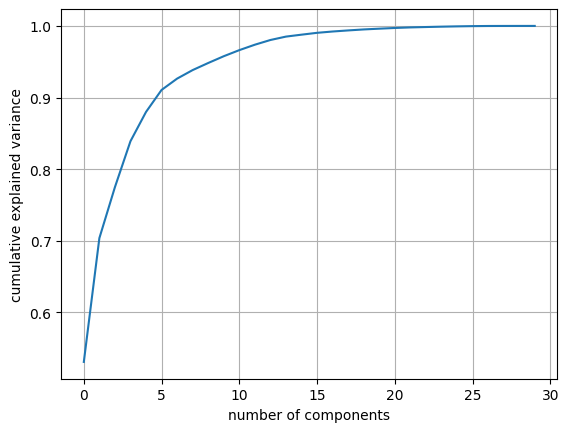

In [5]:
from sklearn.decomposition import PCA

pca = PCA().fit(scaled_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

### Based on the plot above, we can reduce the diemensions to 8 features.

In [6]:

pca = PCA(n_components=8)  
df_pca = pca.fit_transform(scaled_df) 

df_pca = pd.DataFrame(data=df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.387021,0.426895,-0.541703,0.048483,-0.072198,0.190817,0.236313,-0.039454
1,0.462308,-0.556947,-0.205175,-0.042830,0.016111,0.015603,0.043140,0.020643
2,0.954621,-0.109701,-0.147848,-0.001068,-0.033798,0.069061,-0.108167,0.007361
3,1.000816,1.525089,-0.053271,-0.207916,-0.219381,0.388007,0.194517,0.143498
4,0.626828,-0.302471,-0.409336,0.238811,-0.002192,-0.157212,-0.063308,0.045933


# Some methods to determine the optimal number of clusters

## Elbow Method 
The elbow method helps to determine the optimal number of clusters by plotting the sum of squared distances against the number of clusters and looking for a "elbow" point. We usually use the kmeans.inertia_  from scikitkit learn to get this. Inertia is defined as the sum of squared distances between each point and its assigned cluster centroid. You can read more about this here https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Elbow_method function 

In [7]:
from sklearn.cluster import KMeans
def elbow_method(df, max_cluster): 
    inertias = list() 
    for k in range(1, max_cluster+1):
        cluster = KMeans(n_clusters=k,init="k-means++", random_state=12345)
        cluster.fit(df)
        inertia = cluster.inertia_ 
        inertias.append(inertia)
    return inertias

## Normalize the feature dataframe and get inertias 

In [8]:
inertias = elbow_method(df_pca,10)

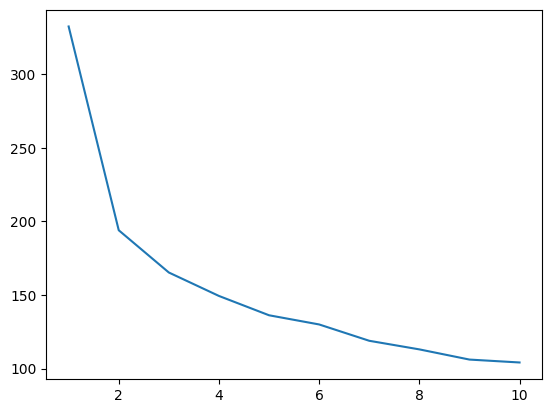

In [9]:
plt.plot(np.arange(len(inertias))+1, inertias)
plt.show()


## Next: We will try Silhouette Method for determining the number of clusters  
The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. We usully employ built-in functions from scikitlearn for this. You can read more about this here: https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.silhouette_score.html

To create silhouette plot we will use fill_betweenx function from matplotlbi.axes. https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_betweenx.html

### Task 1: Complete the missing portion of the silhouette score functions

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score 
def get_silhouette(n_clusters, data): 
    cluster = KMeans(n_clusters=n_clusters, init="k-means++", random_state=12345)
    cluster_labels = cluster.fit_predict(data)
    sil_avg = None ## get silhouette score
    sil_sample = silhouette_samples(data, cluster_labels)
    return sil_avg, sil_sample, cluster_labels
    

In [11]:
num_cluster_to_try = [2,3,4,5,6,7,8]

In [12]:
def plot_silhoutte_cluster(cl,data ):
    sil_avg, sil_samples, cluster_labels = get_silhouette(cl, data)
    y_min = 10 
    fig, ax = plt.subplots() 
    for k in range(cl): 
        k_sil_samples = sil_samples[cluster_labels == k] 
        k_sil_samples.sort()
        n_elem = k_sil_samples.shape[0] 
        y_max = y_min + n_elem 
        sil_colors = cm.nipy_spectral(float(k) / len(np.unique(cluster_labels)))
        y = np.arange(y_min, y_max)
        x1 = 0 
        x2 = k_sil_samples 
        ax.fill_betweenx(y, x1, x2, edgecolor=sil_colors, facecolor=sil_colors, alpha=0.5)
        ax.text(-0.2, y_min + 0.5 * n_elem, str(k))
        y_min = y_min + k_sil_samples.shape[0] + 10 
    ax.axvline(x=sil_avg, color="red", linestyle="--")
    ax.set_yticks([])
    ax.set_xlim([-0.1, 1.0])
    ax.set_xlabel('Silhouette Coeff.')
    ax.set_ylabel('Cluster Label')
    

TypeError: '>' not supported between instances of 'float' and 'NoneType'

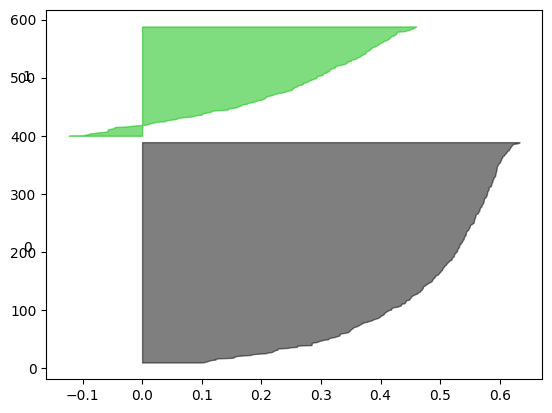

In [13]:
for cl in num_cluster_to_try: 
    plot_silhoutte_cluster(cl, df_pca)

# Partition-based Clustering
Partition-based clustering focuses on grouping data points into a fixed number of non-overlapping clusters. These algorithms aim to minimize the distance between data points within the same cluster while maximizing the distance between clusters.  You can read more about the scikitlearn implementation here https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

### Now lets try to cluster the a fictional dataset using Kmeans

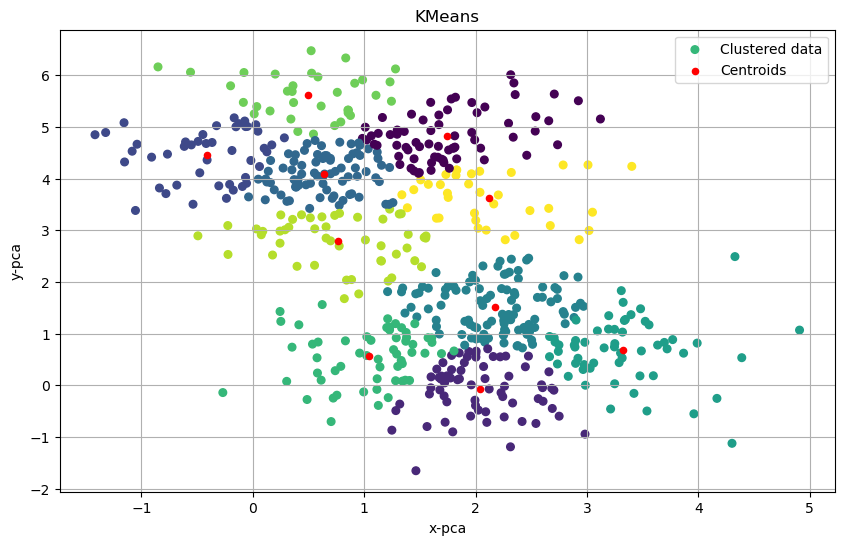

In [13]:

X, y_true = make_blobs(n_samples=600, centers=2, cluster_std=0.90, random_state=0)

kmeans = KMeans(init="k-means++", n_clusters=10, n_init=4, random_state=0)
kmeans.fit(X)

y_kmeans = kmeans.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, label='Clustered data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=20, c='red', label='Centroids')
plt.title('KMeans')
plt.xlabel('x-pca')
plt.ylabel('y-pca')
plt.legend()
plt.grid()
plt.show()


### Task 2: Now try it on the breast cancer dataset with the optimal number of clusters determined previously. Do not forget to visualize the results.

In [14]:
## Your code here

# Hierarchical Clustering 
Hierarchical clustering is a class of algorithms that create a hierarchy of clusters, where each cluster is nested within a larger cluster. You can read about the scikit learn implementation here: https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

An important parameter here is the linkage criterion as well as the number of clusters. 

In [15]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn import manifold
from scipy.cluster.hierarchy import dendrogram

### First, lets try to observe the dendrogram for hierachical clustering

In [16]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

def plot_dendrogram(model, **kwargs):
 
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

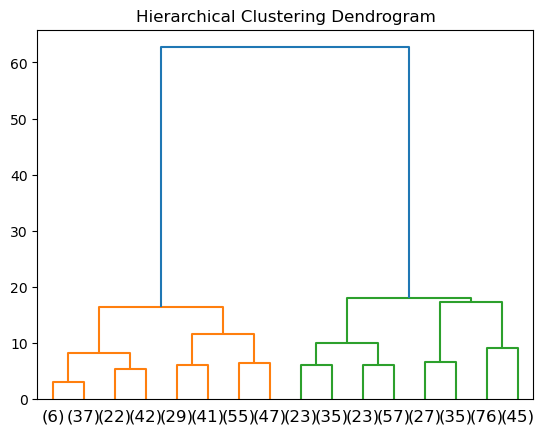

In [17]:
X, y_true = make_blobs(n_samples=600, centers=2,cluster_std=0.90, random_state=0)
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")

plot_dendrogram(model, truncate_mode="level", p=3)

### Now, lets try to observe how the different linkage criterion methods behave on a random dataset.

In [18]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    plt.scatter(
        X_red[:, 0], X_red[:, 1],
        c=plt.cm.nipy_spectral(labels / 10),
        s=50,
        alpha=0.5
    )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

def plot_agg_clusters(linkage, data, n_clusters): 
    agg_cluster = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters)
    agg_cluster.fit(data)
    pred = agg_cluster.fit_predict(data)
    plot_clustering(data, pred, "%s linkage" % linkage)
    plt.show()


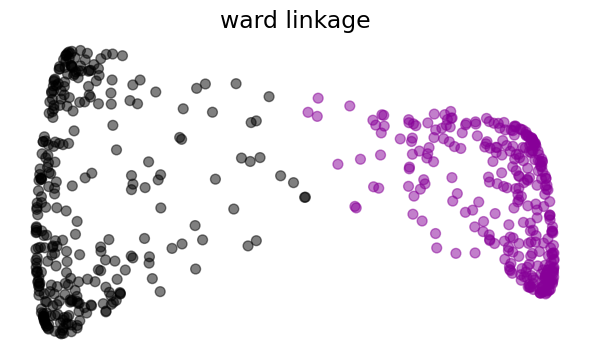

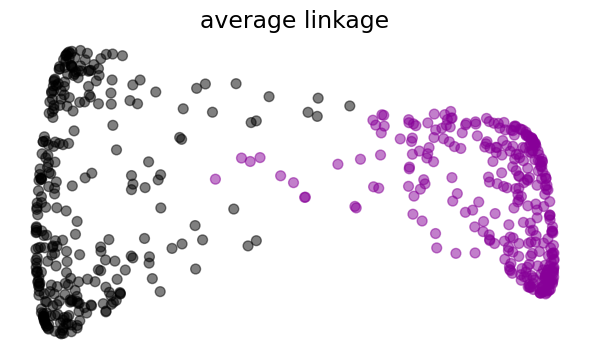

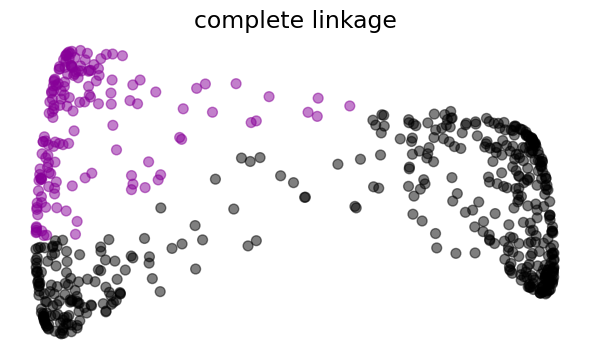

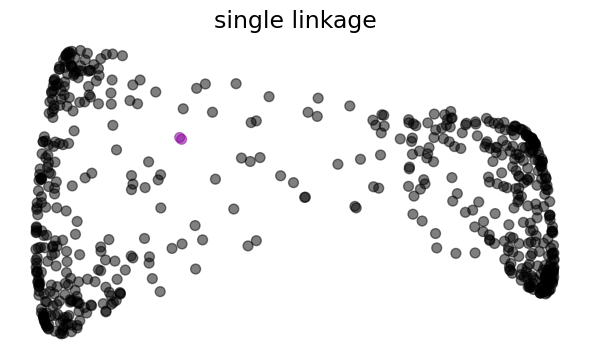

In [19]:

linkages = ["ward", "average", "complete", "single"]
d = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
for lin in linkages: 
    plot_agg_clusters(lin, d, 2)

### Task 3: Now try to cluster the breast cancer dataset with hierachical clustering. Do not forget to visualize the results.

In [20]:
## Your code here

# Model-based Clustering 
Model-based clustering is a class of algorithms that assume the data is generated from a mixture of underlying probability distributions. These algorithms aim to estimate the parameters of the distributions and assign data points to the most likely distribution. We will look at Gaussian Mixture Models. You can read more about this here: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html


The most important parameter in model based methods like GMM is the K, which is the number of cluster. The optimal number of clusters is determined by selecting the model with the lowest AIC or BIC value. A lower AIC suggests a better balance between fit and complexity, while a lower BIC indicates a preference for simpler models, especially beneficial for larger datasets. This process helps identify the most appropriate number of clusters that accurately represents the underlying data structure without overfitting. 

The scikitlearn librray has a great implemttaion of these methods: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.aic

## First, let's see how AIC and BIC behaves with perfect data. 

In [21]:
from sklearn import mixture
X, y_true = make_blobs(n_samples=400, centers=4,cluster_std=0.60, random_state=0)

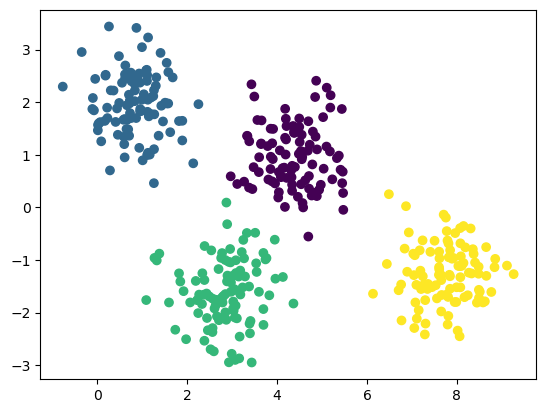

In [22]:
X.shape
plt.scatter(X[:, 1], X[:, 0], c=y_true)

In [23]:
n_cluster_list = [2,3,4,5,6,7,8]
aic_list = list() 
bic_list = list() 
for cl in n_cluster_list: 
    gmm = mixture.GaussianMixture(n_components=cl) 
    gmm.fit(X)
    aic = gmm.aic(X)
    bic = gmm.bic(X)
    aic_list.append(aic)
    bic_list.append(bic)

14 14 14


<AxesSubplot:xlabel='cluster', ylabel='coeff'>

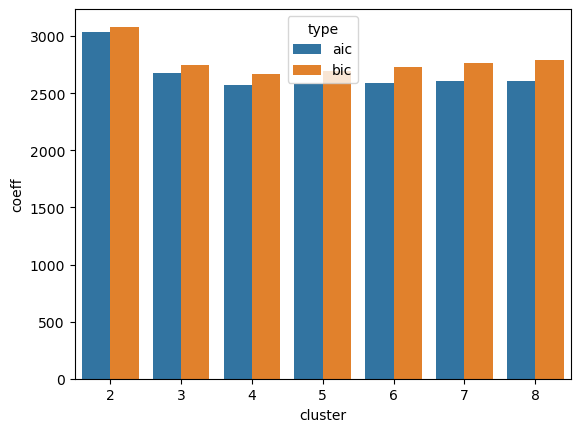

In [24]:
tmp1 = aic_list + bic_list 
tmp2 = ['aic' for _ in aic_list]  + ['bic' for _ in bic_list]
tmp3 = n_cluster_list + n_cluster_list 
print(len(tmp1), len(tmp2), len(tmp3))
data = [[a, b, c] for a, b, c in zip(tmp1, tmp2, tmp3)]
df = pd.DataFrame(data, columns=['coeff', 'type', 'cluster'])
sns.barplot(df, x='cluster', y='coeff', hue='type')

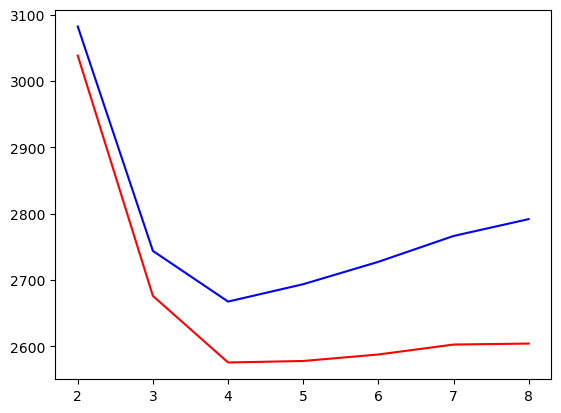

In [25]:
plt.plot(n_cluster_list, aic_list, color='red')
plt.plot(n_cluster_list, bic_list, color='blue')
plt.show()


### Task 4: Now lets try to fit an initial model on the breast cancer dataset to identify the K that gives the best AIC and BIC values.

In [26]:
## Your code here


### Task 5: Cluster the data with the optimal K you found previously. Do not forget to visualize the results.

In [27]:
## Your code here

# Density-based Clustering
Density-based clustering like DBSCAN is a class of algorithms that identify clusters based on regions of high density in the data. You can read more about DBSCAN here: https://scikit-learn.org/dev/modules/generated/sklearn.cluster.DBSCAN.html. The most important parameters here are eps and min_samples. eps defines the maximum distance between two samples for one to be considered as in the neighborhood of the other. min_samples specifies the minimum number of samples required to form a cluster.

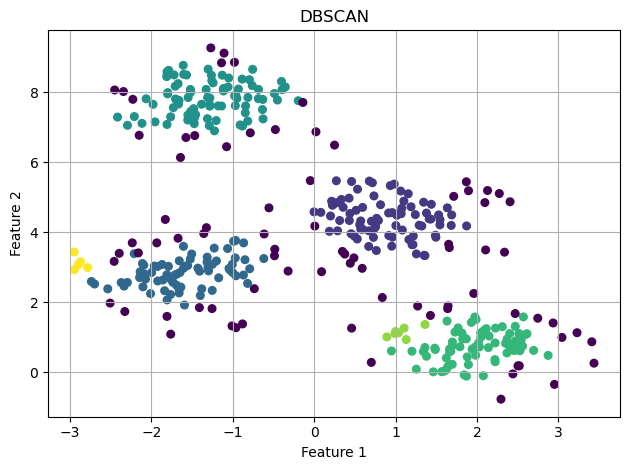

In [28]:
from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, s=30, cmap='viridis')
plt.title('DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()

plt.tight_layout()
plt.show()


### Task 6: Now let's try it on the breast cancer dataset. Do not forget to visualize the results.

In [29]:
## Your code here